In [1]:
from stable_baselines3 import PPO, DDPG
from gym.wrappers import FlattenObservation
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import StopTrainingOnNoModelImprovement, EvalCallback
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
import torch
from stable_baselines3.common.evaluation import evaluate_policy
from UR10 import UR10, visualize
import numpy as np

pybullet build time: May  2 2023 06:19:30


In [62]:


# model = DDPG.load('./models/bestmodels/best_model-ddpg-700k-10sr.zip')
'''env_test = FlattenObservation(UR10(
    is_dense=False, is_train=True, is_fixed=False, angle_control=True, 
    force=0.1,  complex_obs_space=True, pos_range=1.0, max_steps=1000
))'''


'''model = PPO.load('./models/bestmodels/best_model-ppo-restricted-2.zip')
env_test = FlattenObservation(UR10(
    is_dense=False, is_train=True, is_fixed=False, angle_control=False, 
    force=0.1,  complex_obs_space=False, pos_range=0.5, max_steps=500
))'''

model = DDPG.load('./models/bestmodels/best_model-ddpg-2-1m07sr.zip')
env_test = FlattenObservation(UR10(
    is_dense=False, is_train=True, is_fixed=False, angle_control=True, 
    force=0.1,  complex_obs_space=True, pos_range=0.5, max_steps=1000
))


res = evaluate_policy(model, env_test, 100, return_episode_rewards=True, deterministic=True)[1]

In [63]:
print(np.sum(np.array(res) < 1000) / len(res))

0.62


0.6


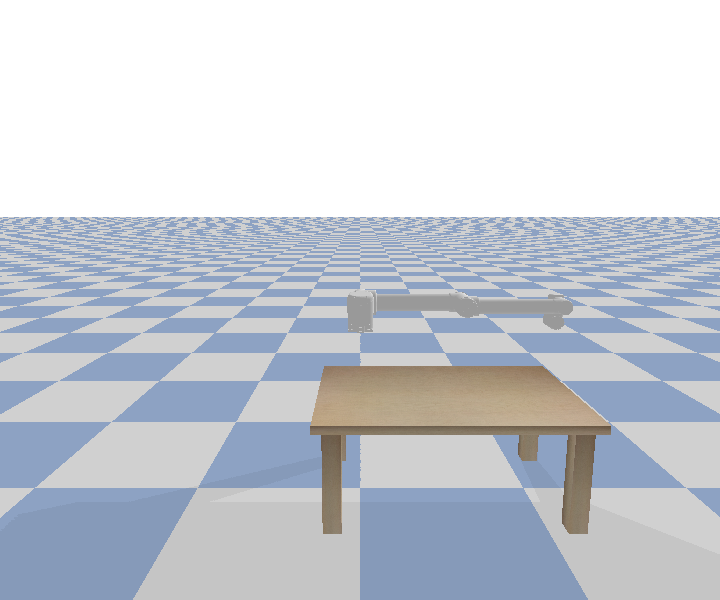

[ 1.1842999e+00  2.5614101e-01  1.0116000e+00 -1.8725086e-04
  1.7200724e-06 -6.7203457e-04]
[ 1.1810533   0.25510448  1.1021483  -0.15622512 -0.03587081  1.4255654 ] 0.64275616 -0.4707681177517843


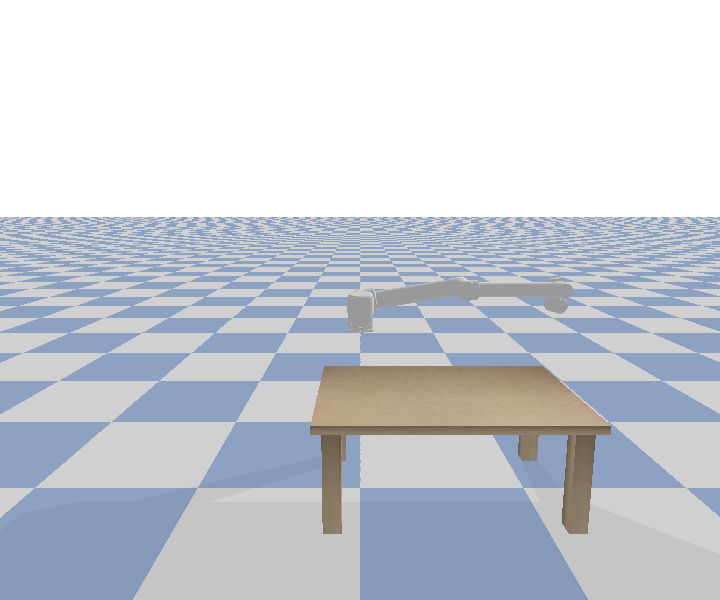

[ 0.89345074  0.20158239  1.5615205  -1.0789645  -0.20477933  0.68780905] 0.66487145 -0.48222926938758937


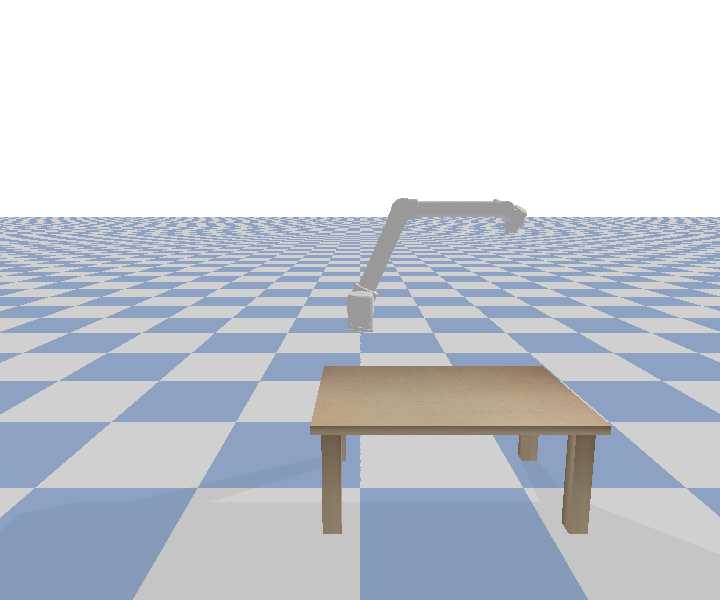

[ 0.37638447  0.11345212  1.6378529  -1.2932308  -0.18792479 -0.36944443] 0.6853697 -0.4926306165412089


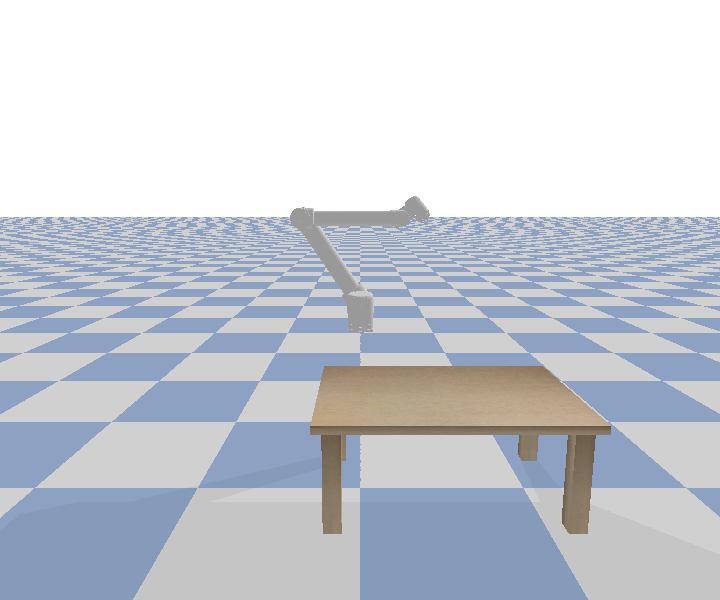

[-0.04650191  0.07174387  1.2606765  -0.7131707  -0.00325577 -0.57222086] 0.7007597 -0.5003023741493051


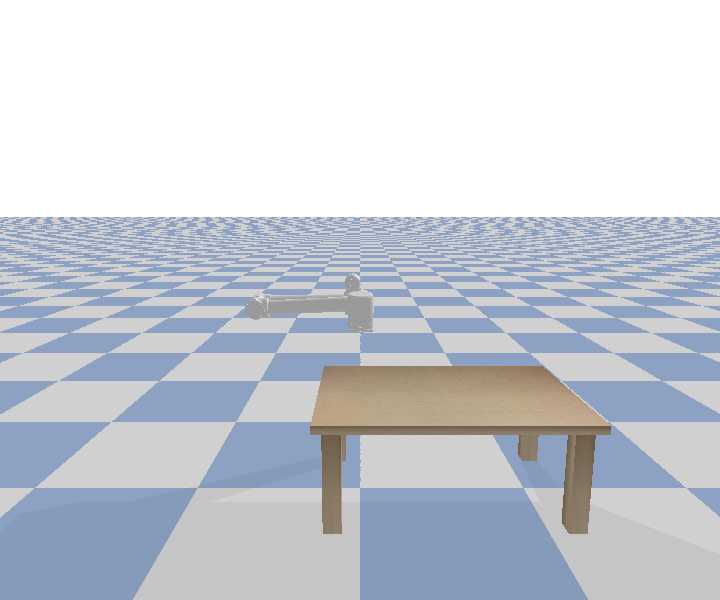

[-0.09322423  0.11456247  0.9743123   0.47551286  0.14266537 -0.31636295] 0.7030962 -0.5014569074320319


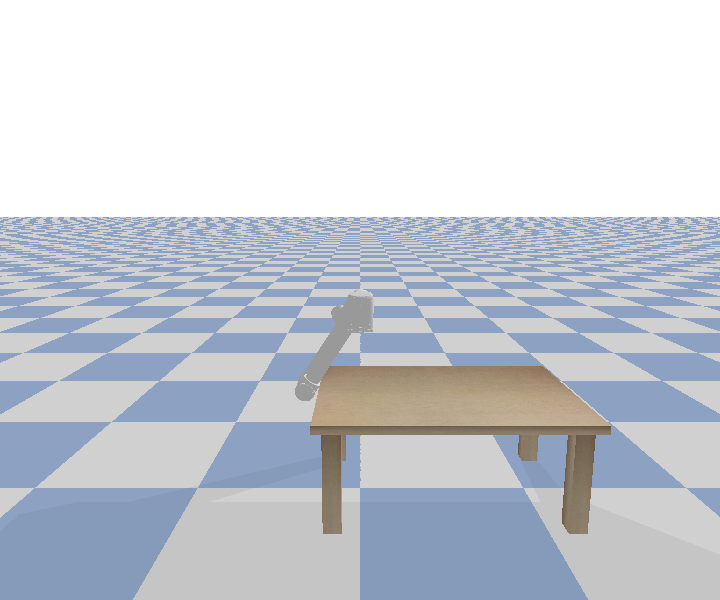

8484 [0.10671912 0.17846297 1.0214999  0.32658434 0.24161485 0.5392033 ] -0.4053377020836084 False


In [65]:
model = DDPG.load('./models/bestmodels/best_model-ddpg-700k-10sr.zip')

ur = UR10(
    is_train=True, is_fixed=False, angle_control=True, 
    force=0.1, complex_obs_space=True, pos_range=1.0, max_steps=1000
)

env = UR10(
    is_dense=True, is_train=True, is_fixed=False, angle_control=True, force=0.1, 
    complex_obs_space=True, complex_reward=True, pos_range=0.5
)

s = env.reset(target_pos=np.array([0.6, 0.0, 1.0]))
# k = 0
visualize(env)
print(s['observation'])

while True:
    action = np.array([0, -1, +1, -1, -1])
    
    s, r, d, i = env.step(action)
    
    if k % 100 == 0:
        print(s['observation'], s['distance'], r)
        visualize(env)
    
    if d:
        print(k, s['observation'], r, i['is_success'])
        break
    
    k+= 1
    